## Question 1

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import json
import preprocessor as p
import re
import nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:

df=pd.read_csv("msft.csv")

In [ ]:
# equal width
df["5bins"]=pd.cut(df["Close"], bins=5)

print(df["5bins"].head())

0    (53.926, 63.62]
1    (53.926, 63.62]
2    (53.926, 63.62]
3    (53.926, 63.62]
4    (53.926, 63.62]
Name: 5bins, dtype: category
Categories (5, interval[float64, right]): [(15.102, 24.844] < (24.844, 34.538] < (34.538, 44.232] <
                                           (44.232, 53.926] < (53.926, 63.62]]


In [ ]:
# equal width
df["5bins2"]=pd.qcut(df["Close"],q=5, labels=False, duplicates="drop")

df["5bins2"].head()

0    4
1    4
2    4
3    4
4    4
Name: 5bins2, dtype: int64

## Question 2

In [4]:
vdf = pd.read_csv("vehicles.csv")
vdf = vdf[((vdf["class"] == "van") | (vdf["class"] == "bus"))]
vdf["class"]=vdf["class"].replace(["van"],0)
vdf["class"]=vdf["class"].replace(["bus"],1)

In [5]:
def calcentropy(data):
    labels=data['class'].unique()
    n=data.shape[0]
    entropy=0
    for i in labels:
        count=data[data['class']==i].shape[0]
        p=count/n
        entropy= entropy- p*np.log2(p)
    return entropy


In [11]:
def findbestsplit(data,feature,threshold):
    sorV=data.sort_values(feature)
    uniqV=sorV[feature].unique()
    splitpts=[]
    for i in range(len(uniqV)-1):
      splitpts.append((uniqV[i]+uniqV[i+1])/2)   
    best_split=None
    bestigain=0
    currentropy=calcentropy(data)
    for split in splitpts:
        ldata=sorV[sorV[feature]<=split]
        rdata= sorV[sorV[feature]>split]
        if (ldata.shape[0]==0 | rdata.shape[0]==0):
            continue
        igain=currentropy-(ldata.shape[0]/data.shape[0])*calcentropy(ldata)-(rdata.shape[0]/data.shape[0])*calcentropy(rdata)
        if igain > bestigain:
            bestigain = igain
            best_split = split
    if bestigain < threshold:
        return None, None
    return best_split, bestigain


In [14]:
def discfeature(data,feature,threshold):
    uniqV = data[feature].unique()
    sorV = np.sort(uniqV)
    ranges = []
    for i in range(len(sorV)-1):
        ranstart =sorV[i]
        ranend =sorV[i+1]
        ranname= str(round(ranstart,2))+'-'+str(round(ranend,2))
        randata =data[(data[feature]>=ranstart)&(data[feature]<ranend)]
        if randata.shape[0]==0:
            continue
        if randata['class'].nunique()==1:
           ranname=ranname+' ('+str(randata['class'].iloc[0])+')'
        else:
            split,info_gain = findbestsplit(randata,feature,threshold)
            if split is None:
                ranname+=' ('+str(randata['class'].mode().iloc[0])+')'
            else:
                lrdata= randata[randata[feature] <= split]
                rrdata =randata[randata[feature] > split]
                lrname= str(round(ranstart,2))+ '-' +str(round(split,2))
                rrname= str(round(split,2))+ '-' +str(round(ranend,2))
                lrcls= lrdata['class'].mode().iloc[0]
                rrcls= rrdata['class'].mode().iloc[0]
                lrent= calcentropy(lrdata)
                rrent= calcentropy(rrdata)
                ranname =lrname + '/' + rrname
                ranname=' (' + str(lrcls) + ': ' +str(round(lrent,2)) + ', '
                ranname += str(rrcls) + ': ' +str(round(rrent,2)) + ')'
        ranges.append(ranname)
    return ranges



In [13]:


threshold = 0.1

for feature in vdf.columns:
    print('\n' +feature+ ':')
    ranges=discfeature(vdf,feature,threshold)
    for r in ranges:
        print(r)



compactness:
78-79 (1)
79-80 (1)
80-81 (1)
81-82 (1)
82-83 (1)
83-84 (1)
84-85 (1)
85-86 (1)
86-87 (1)
87-88 (1)
88-89 (0)
89-90 (0)
90-91 (0)
91-92 (0)
92-93 (0)
93-94 (0)
94-95 (0)
95-96 (0)
96-97 (0)
97-98 (1)
98-99 (1)
99-100 (1)
100-101 (1)
101-102 (1)
102-103 (1)
103-104 (1)
104-105 (1)
105-106 (1)
106-107 (1)
107-108 (1)
108-109 (1)
109-110 (1)
110-111 (1)
111-113 (1)
113-114 (1)

circularity:
34-35 (0)
35-36 (0)
36-37 (0)
37-38 (0)
38-39 (0)
39-40 (0)
40-41 (0)
41-42 (0)
42-43 (1)
43-44 (1)
44-45 (1)
45-46 (1)
46-47 (0)
47-48 (0)
48-49 (0)
49-50 (1)
50-51 (1)
51-52 (1)
52-53 (1)
53-54 (1)
54-55 (1)
55-56 (1)
56-57 (1)
57-58 (1)

distance_circularity:
44-47 (0)
47-49 (0)
49-51 (0)
51-52 (0)
52-53 (0)
53-55 (0)
55-57 (0)
57-58 (0)
58-59 (0)
59-60 (0)
60-61 (0)
61-62 (1)
62-63 (0)
63-64 (0)
64-65 (0)
65-66 (1)
66-68 (0)
68-69 (1)
69-70 (1)
70-71 (1)
71-72 (1)
72-73 (1)
73-74 (1)
74-75 (1)
75-76 (1)
76-77 (1)
77-78 (0)
78-79 (0)
79-80 (1)
80-81 (0)
81-82 (0)
82-83 (0)
83-84 (0)
84

## Question 3

In [55]:


vdf=pd.read_csv('vehicles.csv')
mad = np.mean(abs(vdf.iloc[:, :-1]-np.mean(vdf.iloc[:, :-1])),axis=0)
print('Mean Abs Dev values:')
print(mad)
corrmat=vdf.corr()



Mean Abs Dev values:
compactness                  6.820577
circularity                  5.137066
distance_circularity        13.435935
radius_ratio                27.982753
pr_axis_aspect_ratio         5.149442
max_length_aspect_ratio      2.267877
scatter_ratio               28.347255
elongatedness                6.648313
pr_axisrectangular           2.205922
lengthrectangular           12.015243
majorvariance               26.412580
minorvariance              150.603290
gyrationradius              26.457343
majorskewness                5.383364
minorskewness                3.981691
minorkurtosis                7.315050
majorkurtosis                5.003387
hollows_ratio                6.106587
dtype: float64


In [54]:
corrmat

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axisrectangular,lengthrectangular,majorvariance,minorvariance,gyrationradius,majorskewness,minorskewness,minorkurtosis,majorkurtosis,hollows_ratio
compactness,1.000000,0.692869,0.792444,0.691659,0.093222,0.148249,0.813003,-0.788647,0.813437,0.676143,0.764415,0.818632,0.585347,-0.252984,0.233693,0.156779,0.297780,0.365552
circularity,0.692869,1.000000,0.798492,0.622778,0.149692,0.247467,0.860367,-0.828755,0.857925,0.965776,0.808496,0.852679,0.936080,0.058669,0.148433,-0.015482,-0.113047,0.038677
distance_circularity,0.792444,0.798492,1.000000,0.771644,0.161529,0.264309,0.907280,-0.912307,0.895326,0.774524,0.864432,0.889661,0.705818,-0.231660,0.116478,0.264522,0.147980,0.335453
radius_ratio,0.691659,0.622778,0.771644,1.000000,0.665407,0.448048,0.738460,-0.792557,0.711497,0.570154,0.797588,0.725781,0.539069,-0.182412,0.050534,0.174299,0.380757,0.469278
pr_axis_aspect_ratio,0.093222,0.149692,0.161529,0.665407,1.000000,0.648096,0.106064,-0.185086,0.079982,0.129168,0.274705,0.092182,0.124408,0.152304,-0.056807,-0.034180,0.238195,0.267381
max_length_aspect_ratio,0.148249,0.247467,0.264309,0.448048,0.648096,1.000000,0.166769,-0.180044,0.161861,0.305943,0.319430,0.144606,0.189791,0.294548,0.015218,0.043379,-0.027317,0.143919
scatter_ratio,0.813003,0.860367,0.907280,0.738460,0.106064,0.166769,1.000000,-0.973385,0.992088,0.810648,0.951862,0.996318,0.800932,-0.028618,0.074347,0.210706,0.004053,0.119950
elongatedness,-0.788647,-0.828755,-0.912307,-0.792557,-0.185086,-0.180044,-0.973385,1.000000,-0.950512,-0.775531,-0.938392,-0.956522,-0.766146,0.104875,-0.053346,-0.185189,-0.112046,-0.216725
pr_axisrectangular,0.813437,0.857925,0.895326,0.711497,0.079982,0.161861,0.992088,-0.950512,1.000000,0.813305,0.938266,0.992346,0.798282,-0.016333,0.082346,0.213088,-0.022056,0.098519
lengthrectangular,0.676143,0.965776,0.774524,0.570154,0.129168,0.305943,0.810648,-0.775531,0.813305,1.000000,0.747152,0.798071,0.866479,0.040339,0.137473,0.001183,-0.107718,0.076770


<AxesSubplot:>

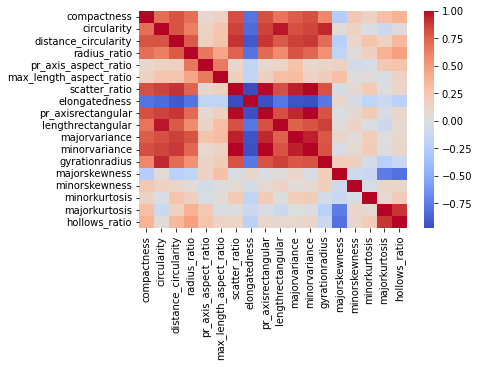

In [53]:
import seaborn as sns

# Plot the correlation matrix as a heatmap
sns.heatmap(corrmat, cmap='coolwarm')


According to the vakues above, the best features are:


* max_length_aspect_ratio: 2.267877
* pr_axisrectangular: 2.205922
* hollows_ratio: 6.106587
* circularity: 5.137066
* majorskewness: 5.383364




Regarding the features that can/should be removed based on the correlation matrix,

* scatter_ratio and pr_axisrectangular: they have a high correlation of 0.992088,& scatter_ratio has a slightly higher MAD value.
* distance_circularity and elongatedness: they have a high negative correlation of -0.912307 & distance_circularity has a much higher MAD value.
* minorvariance and scatter_ratio: they have a high correlation of 0.996318 & minorvariance has a much higher MAD value.

## Question 4

In [ ]:
# a)
vdf=pd.read_csv("vehicles.csv")
vdf=vdf[((vdf["class"]=="van")|(vdf["class"]=="bus"))]
vdf["class"]= vdf["class"].replace(["van"],0)
vdf["class"] =vdf["class"].replace(["bus"],1)
X = vdf.drop("class",axis=1)
pca=PCA(n_components=4)
pca.fit(X)
X_pca=pca.transform(X)
print(pca.explained_variance_ratio_)


[0.94474879 0.02956211 0.01378646 0.00533193]


b)
 To capture 90% of the variance, we need 2 PCs. To capture 99% of the variance, we need 4 PCs.

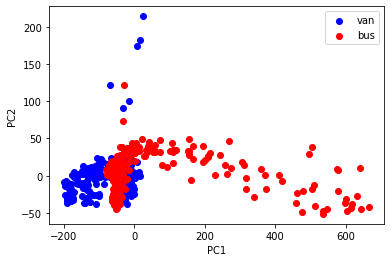

In [ ]:
# c)

plt.scatter(X_pca[:,0][vdf["class"]==0], X_pca[:,1][vdf["class"]== 0], c='b',label='van')
plt.scatter(X_pca[:,0][vdf["class"]==1], X_pca[:,1][vdf["class"] ==1], c='r',label='bus')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


The scatter plot doesn't show any clear pattern, indicating that the two PCs may not be able to fully capture the differences between van and bus classes.

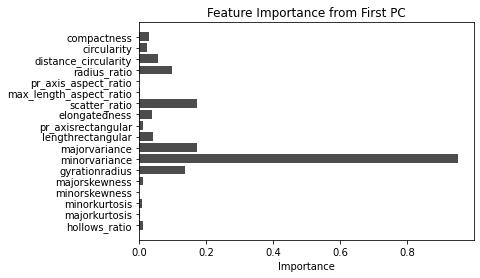

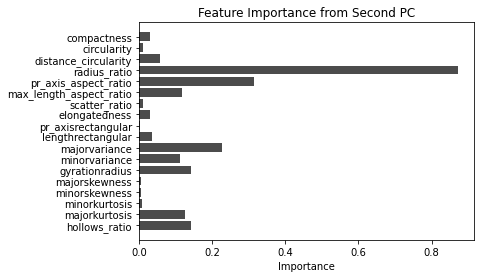

In [ ]:
# d)


featureimportances = abs(pca.components_[:2])
featurenames = list(vdf.columns[:-1])

plt.barh(featurenames,featureimportances[0],align='center',alpha=0.7,color='k')
plt.xlabel('Importance')
plt.title('Feature Importance from First PC')
plt.gca().invert_yaxis()
plt.show()

plt.barh(featurenames,featureimportances[1],align='center',alpha=0.7,color='k')
plt.xlabel('Importance')
plt.title('Feature Importance from Second PC')
plt.gca().invert_yaxis()
plt.show()


From the first PC we can see that "minor variance" and "gyradiation" are the most important features 
From the second PC, we can see that "radius ratio" is the most important feature.

## Question 5

In [63]:

df=open("wh (1).json")
tweets=[json.loads(line) for line in df]
df.close()

In [64]:

processed_tweets = []

def remUrls(text):
    url_pattern=re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'',text)

In [65]:
def remMentions_hashtags(text):
    return p.clean(text)


In [66]:

def remPunctuations(text):
    punctuation_pattern = re.compile(r'[^\w\s]')
    return punctuation_pattern.sub(r'',text)


In [67]:

def converttolowercase(text):
    return text.lower()



In [68]:

def remEmojis(text):
    return p.clean(text)


In [69]:
def ProcessText(tweets):
    for tweet in tweets:
      text=tweet['text']
      text = remUrls(text)
      text = remMentions_hashtags(text)
      text = remPunctuations(text)
      text = converttolowercase(text)
      text = remEmojis(text)
      processed_tweets.append(text)
    return processed_tweets


In [70]:
processed_tweets=ProcessText(tweets)
processed_tweets

['new lenses on the first social media presidency internet archive is making white house social media data available ht',
 'happening now watch biden at the summit',
 'workday is a euphemism weve the honor of working both day amp night while having the honor of serving both our country and',
 'the rs in congress but never lost faith in the american people you inspire us every day reminds us we are here t',
 'poppy its been a joy to have you join each of these conversations always remember that this work continues through young peopl',
 'the people ive really enjoyed getting to not only know my colleagues but the american people its been a great honor to serve',
 'i plan to stay involved and to continue to be deeply engaged on the issues that matter to me the most amp i also encourage you to d',
 'momentum comes from all of you the most important office is that of citizen we must do our part by speaking up and standing w',
 'i intend to continue to speak out about the importance of crea

## Question 6

In [72]:
lemmatizer = nltk.WordNetLemmatizer()

for i,tweet in enumerate(tweets):
    tweet=tweet['text']
    tokens=word_tokenize(tweet.lower()) 

    ftbef=[word for word in tokens if word.isalpha()]
    bgbef = list(ngrams(ftbef, 2))
    bowbe =dict(Counter(ftbef))
    bowdimbef=len(bowbe)


    print("bow dim before preprocessing:", bowdimbef)
    bgbef = dict(Counter(bgbef))
    bgdinbef = len(bgbef)

    print("Bigram dim beforepreprocessing:", bgdinbef)
    print("Top 10 frequent uni-grams before preprocessing:", Counter(ftbef).most_common(10))


    print("Top 10 frequent bi-grams beforepreprocessing:", Counter(bgbef).most_common(10))

    ftaft = [lemmatizer.lemmatize(word) for word in ftbef]
    bowafter = dict(Counter(ftaft))
    bowdimafter = len(bowafter)
    print("bow dim afterpreprocessing:", bowdimafter)
    bgafter = list(ngrams(ftaft, 2))

    bgafter = dict(Counter(bgafter))
    bgdimafter = len(bgafter)
    
    print("Bigram dim afte preprocessing:", bgdimafter)
    print("Top 10 frequent unigrams afterpreprocessing:",Counter(ftaft).most_common(10))
    print("Top 10 frequent bigrams after text preprocessing:",Counter(bgafter).most_common(10))
    print("\n ")

bow dim before preprocessing: 18
Bigram dim beforepreprocessing: 18
Top 10 frequent uni-grams before preprocessing: [('social', 2), ('media', 2), ('rt', 1), ('internetarchive', 1), ('new', 1), ('lenses', 1), ('on', 1), ('the', 1), ('first', 1), ('presidency', 1)]
Top 10 frequent bi-grams beforepreprocessing: [(('social', 'media'), 2), (('rt', 'internetarchive'), 1), (('internetarchive', 'new'), 1), (('new', 'lenses'), 1), (('lenses', 'on'), 1), (('on', 'the'), 1), (('the', 'first'), 1), (('first', 'social'), 1), (('media', 'presidency'), 1), (('presidency', 'internet'), 1)]
bow dim afterpreprocessing: 18
Bigram dim afte preprocessing: 18
Top 10 frequent unigrams afterpreprocessing: [('social', 2), ('medium', 2), ('rt', 1), ('internetarchive', 1), ('new', 1), ('lens', 1), ('on', 1), ('the', 1), ('first', 1), ('presidency', 1)]
Top 10 frequent bigrams after text preprocessing: [(('social', 'medium'), 2), (('rt', 'internetarchive'), 1), (('internetarchive', 'new'), 1), (('new', 'lens'), 1

It seems that the text preprocessing did not change the dimensions of the BoW and bi-gram vectors. But I noticed that in the in one example, the word "be" in the top 10 frequent bi-grams before preprocessing was not present in the top 10 frequent bi-grams after preprocessing. This could be because the word was removed during the text preprocessing step.